In [ ]:
#read the file
import pandas as pd
data = pd.read_csv('HRD.csv')
data.head()

In [ ]:
#check missed values
data.isna().sum()

In [ ]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
#delete unnecessary columns
data.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1,inplace=True) # axis 1 column, inplace - modified in place, it updates the data

In [ ]:
#descriptive statistics: mean,median,mode, quartiles, std dev
#descriptive  statistics for categorical values

data.describe().transpose()

count          mean          std     min     25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.0   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.0   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.0   
Education                 1470.0      2.912925     1.024165     1.0     2.0   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.0   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.0   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.0   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.0   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.0   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.0   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.0   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.0   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.0   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.0   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.0   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.0   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.0   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.0   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.0   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.0   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.0   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.0   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.0   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [ ]:
data.describe(include = 'object').transpose()

count unique                     top  freq
Attrition       1470      2                      No  1233
BusinessTravel  1470      3           Travel_Rarely  1043
Department      1470      3  Research & Development   961
EducationField  1470      6           Life Sciences   606
Gender          1470      2                    Male   882
JobRole         1470      9         Sales Executive   326
MaritalStatus   1470      3                 Married   673
OverTime        1470      2                      No  1054

In [ ]:
#Boxplot of MonthlyRate, do we have outliers?
import matplotlib.pyplot as plt
plt.boxplot(data['MonthlyRate']);


In [ ]:
from scipy.stats import skew
skew(data['MonthlyRate'])

0.01855884556846042

In [ ]:
#correlation analysis
data['MonthlyRate'].corr(data['TotalWorkingYears'])

0.026442471176015423

In [ ]:
cor = data.corr().stack().sort_values(ascending=False)
cor[(cor > 0.7)&(cor< 1)]

In [ ]:
#plot correlation by using Heatmap(seaborn function)
import seaborn as sns
fig, ax = plt.subplots(figsize = (20,10))
sns.heatmap(data.corr(), annot = True)

In [ ]:
#What affecting most to MonthlyIncome by correlation?
#JobLevel, TotalWorkingYears affect to MonthlyIncome by correlation.


In [ ]:
import numpy as np
np.mean(data['MonthlyRate'])


14313.103401360544

In [ ]:
#Construct 95% confidence interval for MonthlyRate
import scipy.stats as st
import numpy as np
st.t.interval(0.95, loc = np.mean(data['MonthlyRate']),scale =st.sem(data['MonthlyRate']), df = len(data['MonthlyRate']) - 1 )

(13948.943328734747, 14677.26347398634)

In [ ]:
len(data['MonthlyRate'])

1470

In [ ]:
#Our goal is to analyze Attrition. Start with chi square test. What is affecting most? Give answer with visualization

In [ ]:
table1 = pd.crosstab(data['Attrition'], data['Education']) # create a contingecy table
table1

Education    1    2    3    4   5
Attrition                        
No         139  238  473  340  43
Yes         31   44   99   58   5

In [ ]:
#H0: education and attrition are independent
#H1: education and attrition are dependent
#both of values are categorical -> we use chi2 test
from scipy.stats import chi2_contingency
val1,pval1, _, _ = chi2_contingency(table1)
if pval1<0.05:
  print('reject H0, education and attrition are dependent')
else:
  print('fail to reject H0, education and attrition are independent ')

fail to reject H0, education and attrition are independent 


<Axes: xlabel='Education', ylabel='count'>

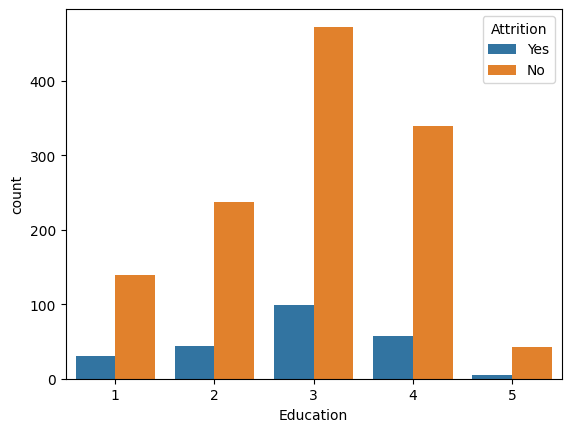

In [ ]:
sns.countplot(x=data['Education'], hue = data['Attrition'])

In [ ]:
table2 = pd.crosstab(data['Attrition'], data['BusinessTravel']) # create a contingecy table
table2

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
No                     138                208            887
Yes                     12                 69            156

In [ ]:
#H0: BusinessTravel and attrition are independent
#H1: BusinessTravel and attrition are dependent
#both of values are categorical -> we use chi2 test
from scipy.stats import chi2_contingency
val2,pval2, _, _ = chi2_contingency(table2)
if pval2<0.05:
  print('reject H0, BusinessTravel and attrition are dependent')
else:
  print('fail to reject H0, BusinessTravel and attrition are independent ')

reject H0, BusinessTravel and attrition are dependent


<Axes: xlabel='BusinessTravel', ylabel='count'>

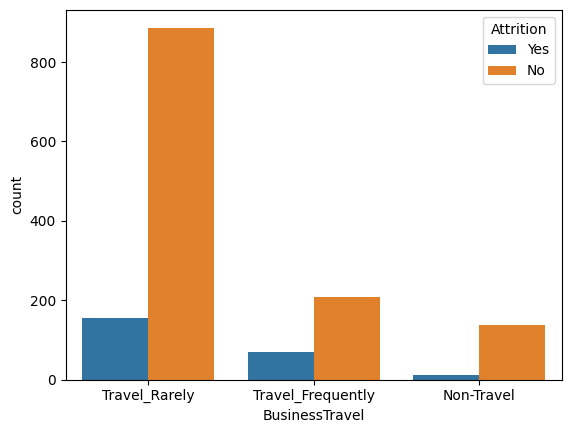

In [ ]:
sns.countplot(x=data['BusinessTravel'], hue = data['Attrition'])

BusinessTravel affects to Attrition

In [ ]:
table3 = pd.crosstab(data['Attrition'], data['JobSatisfaction']) # create a contingecy table
#H0: JobSatisfaction and attrition are independent
#H1: JobSatisfaction and attrition are dependent
#both of values are categorical -> we use chi2 test
from scipy.stats import chi2_contingency
val3,pval3, _, _ = chi2_contingency(table2)
if pval3<0.05:
  print('reject H0, JobSatisfaction and attrition are dependent')
else:
  print('fail to reject H0, JobSatisfaction and attrition are independent ')


reject H0, JobSatisfaction and attrition are dependent


JobSatisfaction affects to Attrition

In [ ]:
#Check if the data is obtained from a normal distribution(which columns we need to check?)
from scipy.stats import shapiro
shapiro(data['MonthlyRate'])

ShapiroResult(statistic=0.9544637203216553, pvalue=5.514464580966898e-21)

In [ ]:
sh, psh = shapiro(data['MonthlyIncome'])
if psh <0.05:
  print('Not normal')
else:
  print('Normal')

Not normal


In [ ]:
#analyze Attrition
yes = data[data['Attrition']=='Yes']
no = data[data['Attrition']=='No']
Group1 = yes['MonthlyIncome']
Group2 = no['MonthlyIncome']

from scipy.stats import mannwhitneyu
v1,p1 = mannwhitneyu(Group1, Group2)
if p1 < 0.05:
  print('The MonthlyIncome between groups are different')
else:
  print('The MonthlyIncome between groups are same(approximately)')



The MonthlyIncome between groups are different


In [ ]:
#analyze Attrition
yes = data[data['Attrition']=='Yes']
no = data[data['Attrition']=='No']
Group1 = yes['MonthlyIncome']
Group2 = no['MonthlyIncome']

from scipy.stats import ttest_ind
v1,p1 = ttest_ind(Group1, Group2)
if p1 < 0.05:
  print('The MonthlyIncome between groups are different')
else:
  print('The MonthlyIncome between groups are same(approximately)')

The MonthlyIncome between groups are different


In [ ]:
sns.boxplot(x = data['Attrition'], y = data['MonthlyIncome'])

We suppose: MonthlyIncome affects to Attrition

It means we should Mann-whitney, kruskal, wilcixon tests

In [ ]:
#Here comparision of sample mean is done with the population mean
#Assumption mean: Assuming the population mean for monthly salaries is 64000
#H0 : There is no significant difference between the mean of the salaries of sample against the population mean assumed
#H1 : There is a significant difference between the mean of the salaries of sample against the population mean

In [ ]:
from scipy.stats import ttest_1samp
ttest_1samp(data['MonthlyIncome'], popmean = 64000, alternative = 'less')


TtestResult(statistic=-468.2436581448997, pvalue=0.0, df=1469)

Conclusion: Our employees don't earn on average 64000

Paired t test or Wilcoxon Signed Rank Test: Here it is not suitable for our data

from scipy.stats import ttest_rel [wilcoxon]

In [ ]:
#plot

In [ ]:
#choose appropriate test

In [ ]:
#Hypothesis Testing: define null hypothesis and alternative hypothesis, set alpha = 0.05 Give answer with visualization

In [ ]:
#Let's do other tests

In [ ]:
#Between PercentSalaryHike & Total Years of Working

In [ ]:
#Is it correct? Job satisfaction and Salary(monthly income) are dependent?
cat1 = data[data['JobSatisfaction']==1]
cat2 = data[data['JobSatisfaction']==2]
cat3= data[data['JobSatisfaction']==3]
cat4= data[data['JobSatisfaction']==4]

group1 = cat1['MonthlyIncome']
group2 = cat2['MonthlyIncome']
group3 = cat3['MonthlyIncome']
group4 = cat4['MonthlyIncome']

from scipy.stats import f_oneway
f_oneway(group1, group2, group3, group4)


F_onewayResult(statistic=0.027038829545482108, pvalue=0.9940001654548951)

average MonthlyIncome of each group in JobSatisfaction are same

In [ ]:
#plot gender vs attrition

As observed above, it is obvious that male attrition is more than female's attrition but is the difference significant? Here is the important point to define the null and alternative hypothesis:

In the context of provided information, the alternative hypothesis assumes that male attrition is pervasive enough to be a factor in attrition throughout the company.

Null Hypothesis: There is no difference in the proportion of attrition for male and female employees in the company.

proportion(Male_attrition)-proportion(Female_attrition) = 0

Alternative Hypothesis: There is a significant difference in the proportion of attrition for male and female employees in the company.

proportion(Male_attrition) - proportion(Female_attrition) is not 0.

Significance Level: 95% Confidence

You can apply **groupby()** function to select values by groups in Chi-Square Test

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Step 3: Prepare the data - Create a contingency table using groupby
grouped_data = df.groupby(['Attrition', 'EducationField']).size().unstack(fill_value=0)

# Step 4: Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(grouped_data)

# Display the results
print("Chi-square value:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:\n", pd.DataFrame(expected, index=grouped_data.index, columns=grouped_data.columns))
